In [1]:
# import os
# os.getcwd()
# os.chdir('/home/chtung/project_MC')

import numpy as np
import time
from tqdm import tqdm, trange
from WLM import WLChain
import matplotlib
import matplotlib.pyplot as plt
from scipy.io import savemat, loadmat

<Figure size 1152x1152 with 0 Axes>

In [2]:
## Chain parameters
# Coordinate of C atoms in each unit
# unit_C = load('b_c.dat')';
unit_C = np.zeros((3,1))

# Degree of polymerization
N_backbone = 1000

# Chain stiffness (placeholder)
a_backbone = 1

# Unit persistence
lambda_backbone = 1

# Call WLChain class
chain = WLChain(N_backbone,a_backbone,lambda_backbone,unit_C)
chain.apply_SA = 1
chain.d_exc = 0.1
chain.f = 0.0

kappa_list = np.array([50])
epsilon_list = [0]

lm=[(0,0),(2,0),(4,0)]

parameters_list = []
S_q_lm_list_param = []
g_r_lm_list_param = []
for kappa in kappa_list:
    for epsilon in epsilon_list:
        parameters_list.append([kappa, epsilon])
        
        data = loadmat("./mat/sq_lm_test_{}_{}.mat".format(kappa,epsilon))

In [3]:
S_q_lm_list_param = data['S_q_lm_list_param']
g_r_lm_list_param = data['g_r_lm_list_param']
rr = data['rr'][0]
qq = data['qq'][0]

/SNS/users/ccu/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/SNS/users/ccu/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


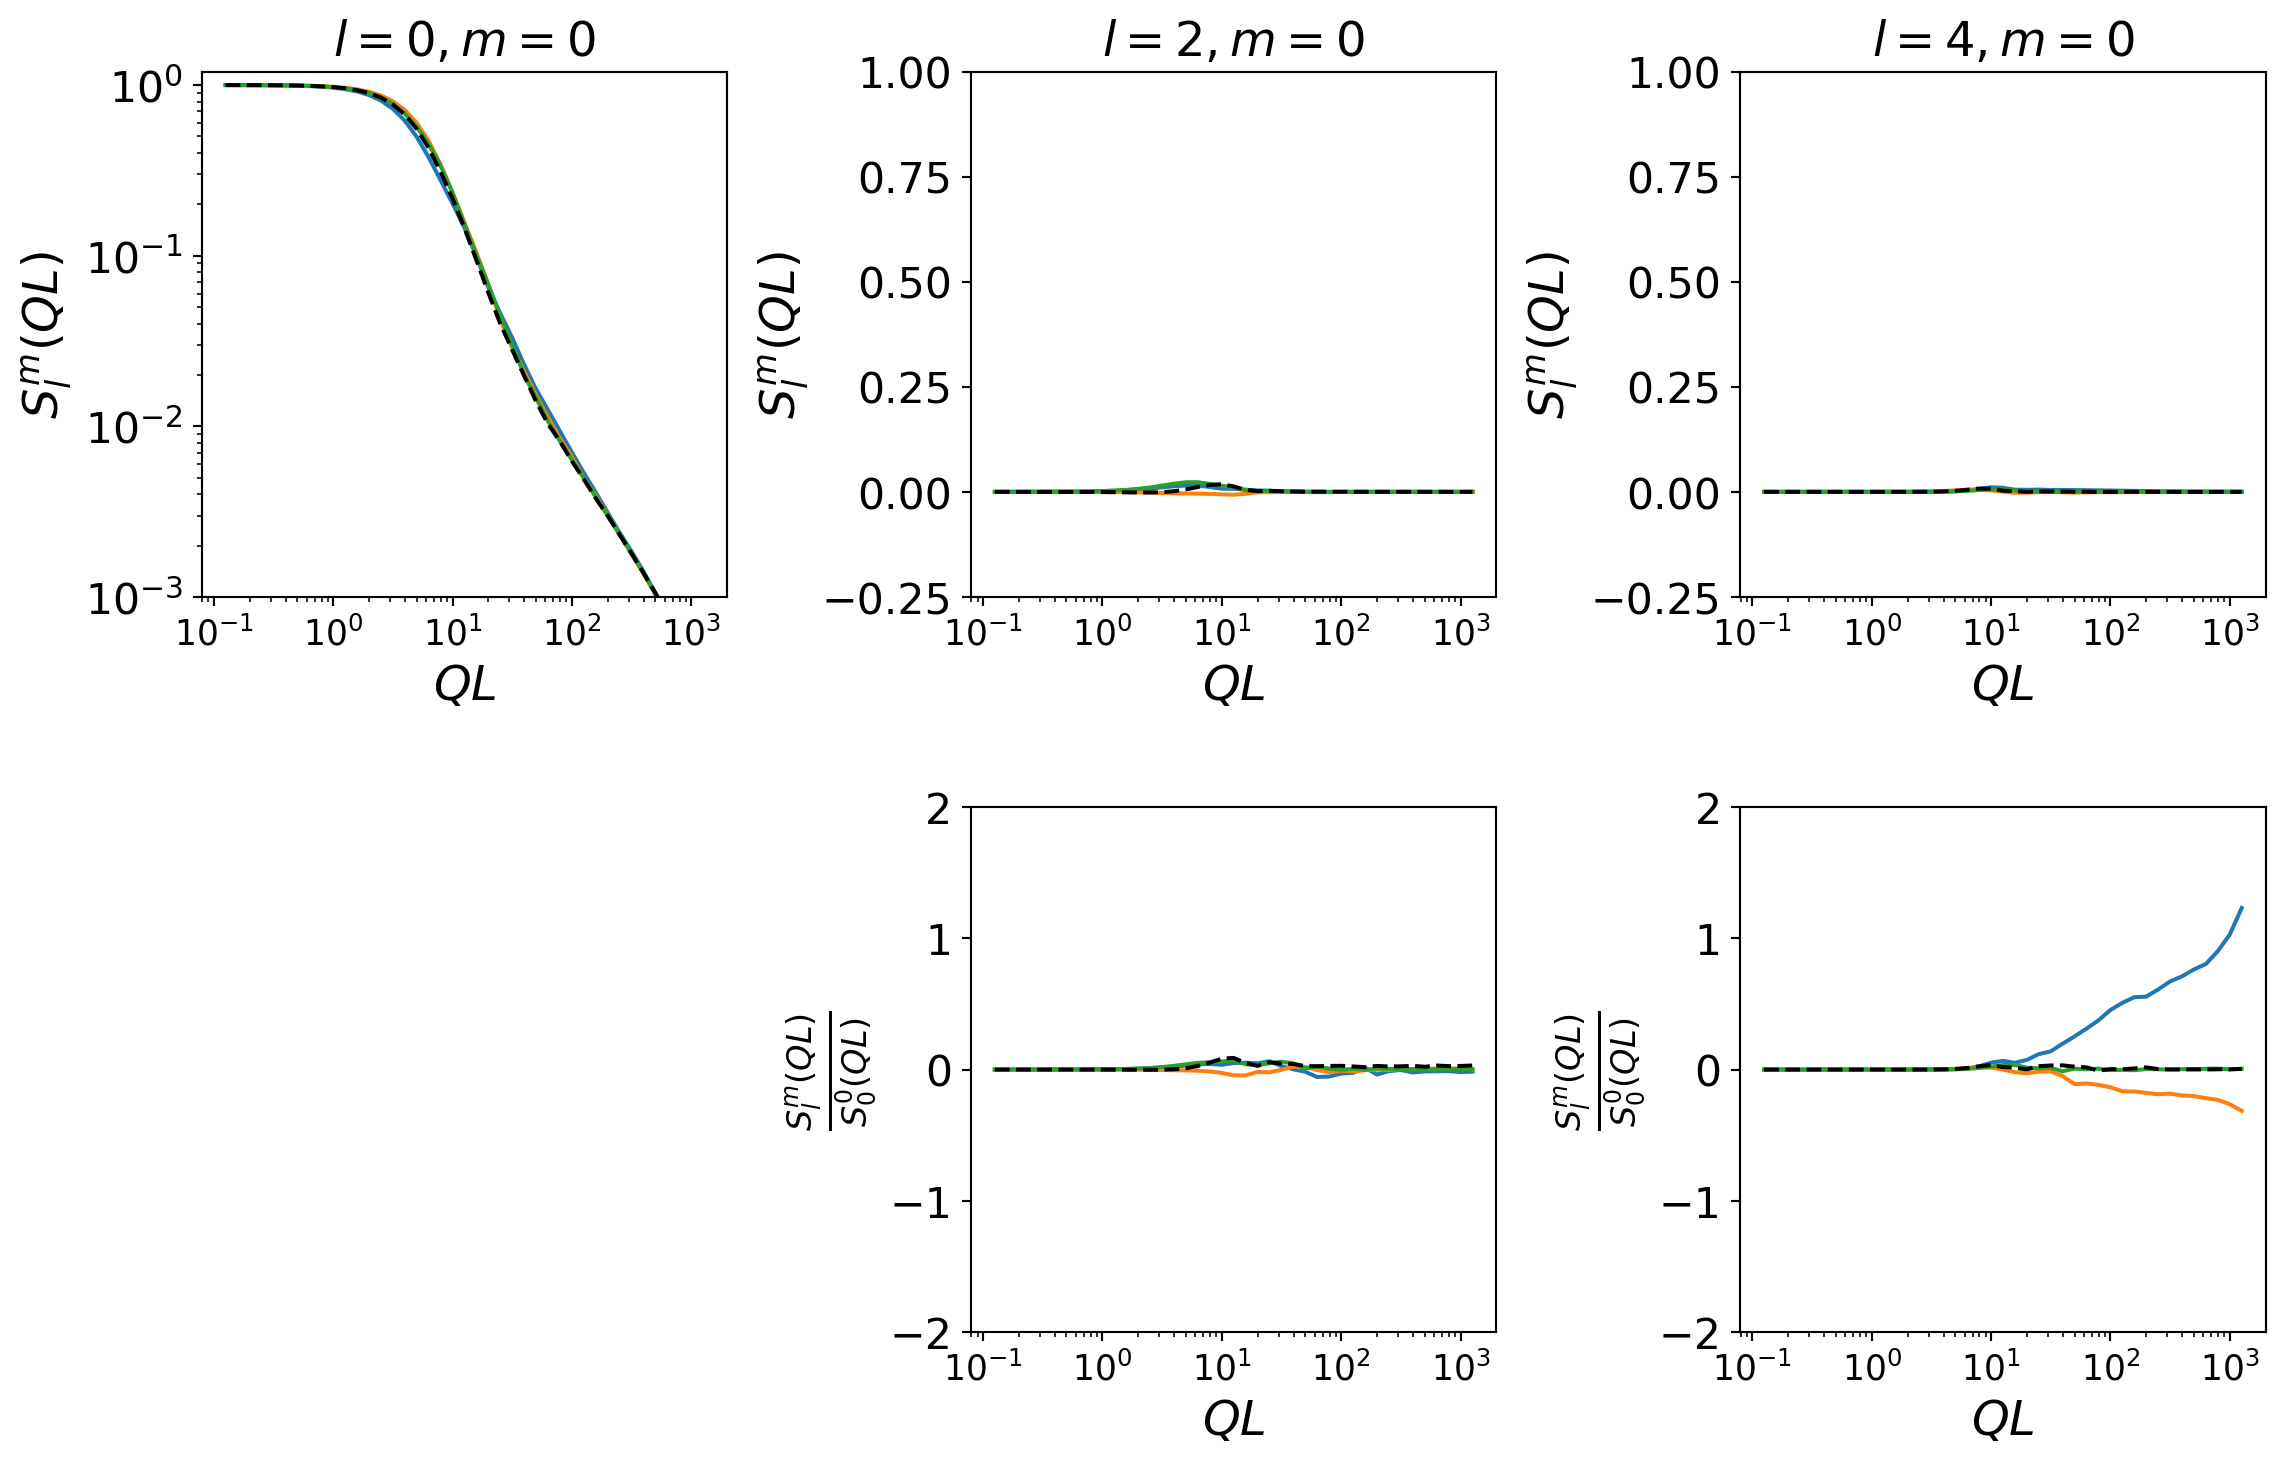

In [4]:
fig = plt.figure(figsize=(12, 8),dpi=192)
colors  = ['C0','C1','C2','C3','C4']

for i, params in enumerate(parameters_list):
    kappa = params[0]
    epsilon = params[1]
    for k, lm in enumerate([(0,0),(2,0),(4,0)]):
        ax = fig.add_subplot(2,3,k+1)
        for j, grid in enumerate(['SC','RD','RT']):
            S_q_lm_list = S_q_lm_list_param[i][j,:]
            S_q_lm = S_q_lm_list[:,k]
            
            ax.plot(qq*N_backbone,S_q_lm*np.sqrt(4*np.pi))
                
        j=3
        S_q_lm_list = S_q_lm_list_param[i][j,:]
        S_q_lm = S_q_lm_list[:,k]
        
        ax.plot(qq*N_backbone,S_q_lm*np.sqrt(4*np.pi),'--k')
        ax.set_title(r'$l={}, m={}$'.format(*lm),fontsize=18)
        ax.set_xlabel(r'$QL$',fontsize=18)
        ax.set_ylabel(r'$S_{l}^{m}(QL)$',fontsize=18)
        ax.set_xscale('log')
        
        ax.tick_params(axis='y', which='major', labelsize=16)
        ax.tick_params(axis='x', which='major', labelsize=13)
        ax.set_ylim([-0.25,1])
        if lm[0] == 0:
            ax.set_yscale('log')
            ax.set_ylim([1e-3,1.2])
        ax.set_box_aspect(1)

for i, params in enumerate(parameters_list):
    kappa = params[0]
    epsilon = params[1]
    for k, lm in enumerate([(2,0),(4,0)]):
        ax = fig.add_subplot(2,3,k+5)
        for j, grid in enumerate(['SC','RD','RT']):
            S_q_lm_list = S_q_lm_list_param[i][j,:]
            S_q_00 = S_q_lm_list[:,0]
            S_q_lm = S_q_lm_list[:,k+1]
            
            ax.plot(qq*N_backbone,S_q_lm/S_q_00, color=colors[j])
                
        j=3
        S_q_lm_list = S_q_lm_list_param[i][j,:]
        S_q_lm = S_q_lm_list[:,k+1]
        S_q_00 = S_q_lm_list[:,0]
        
        ax.plot(qq*N_backbone,S_q_lm/S_q_00,'--k')
        # ax.set_title(r'$l={}, m={}$'.format(*lm),fontsize=18)
        ax.set_xlabel(r'$QL$',fontsize=18)
        ax.set_ylabel(r'$\frac{S_{l}^m(QL)}{S_{0}^0(QL)}$',fontsize=18)
        ax.set_xscale('log')
        ax.set_ylim([-2,2])
        
        ax.tick_params(axis='y', which='major', labelsize=16)
        ax.tick_params(axis='x', which='major', labelsize=13)
        ax.set_box_aspect(1)
            
plt.tight_layout()


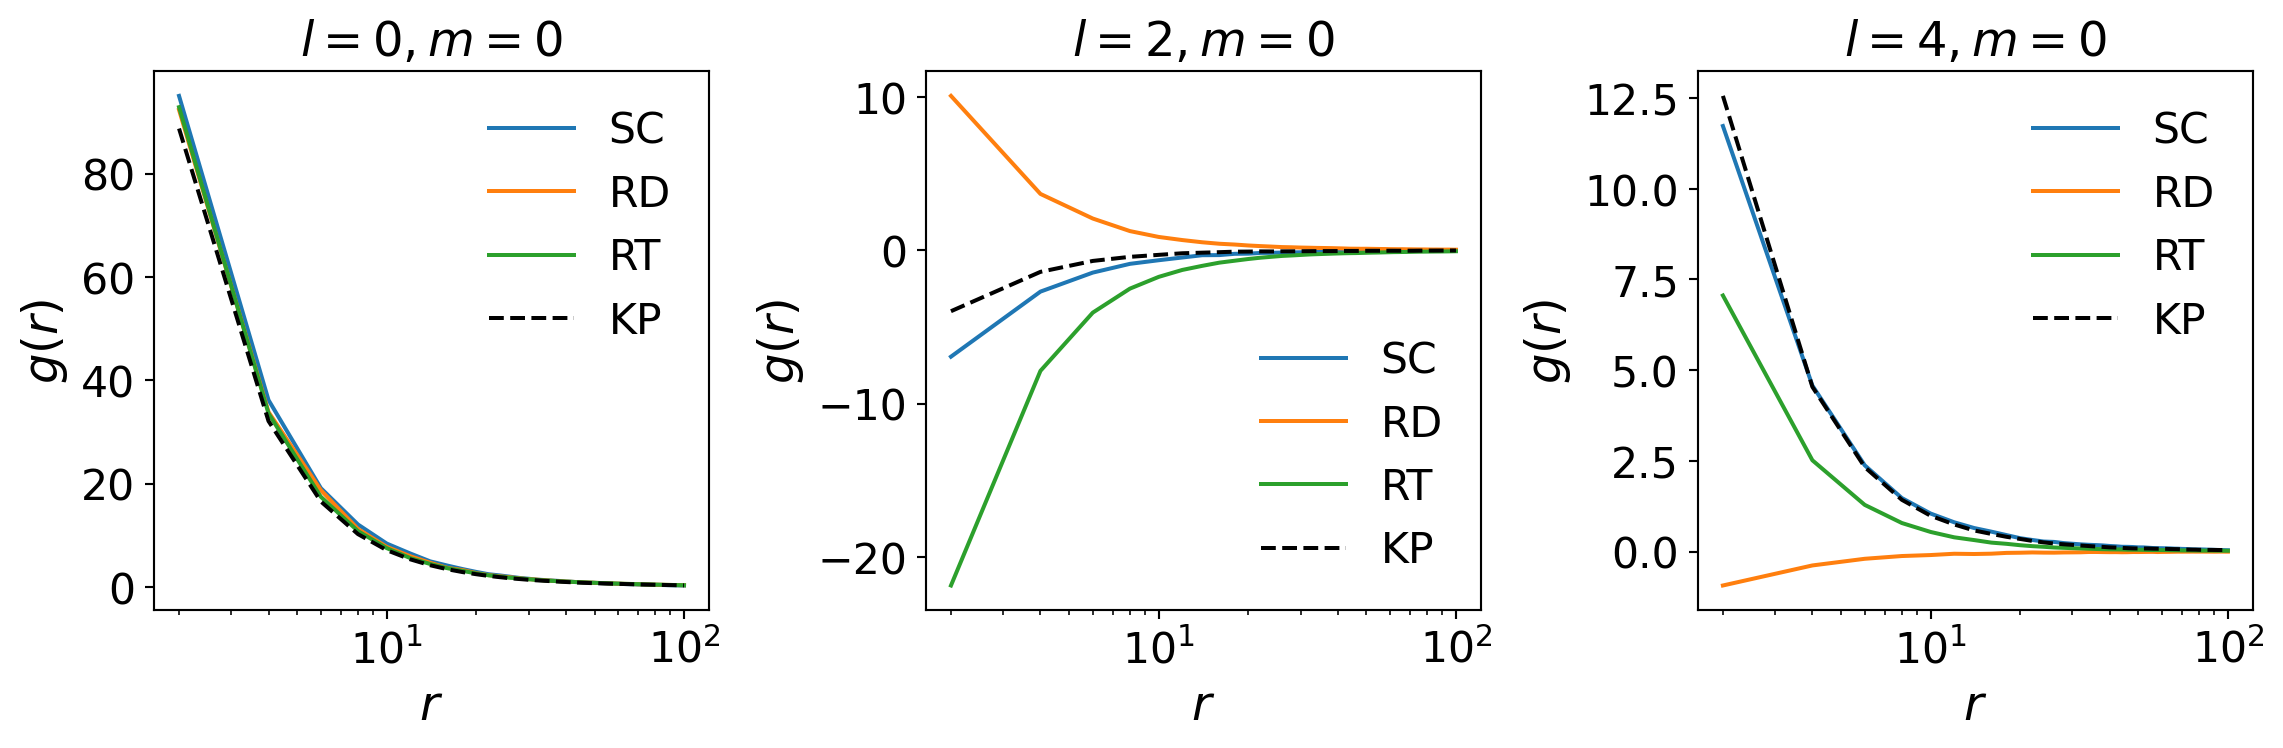

In [5]:
fig = plt.figure(figsize=(12, 4),dpi=192)
colors  = ['C0','C1','C2','C3','C4']

for i, params in enumerate(parameters_list):
    kappa = params[0]
    epsilon = params[1]
    for k, lm in enumerate([(0,0),(2,0),(4,0)]):
        ax = fig.add_subplot(1,3,k+1)
        for j, grid in enumerate(['SC','RD','RT']):
            g_r_lm_list = g_r_lm_list_param[i][j,:]
            g_r_lm = g_r_lm_list[:,k]
            
            ax.plot(rr[1:],g_r_lm[1:]*np.sqrt(4*np.pi), label=grid)
            ax.set_title(r'$l={}, m={}$'.format(*lm),fontsize=18)
            ax.set_xlabel(r'$r$',fontsize=18)
            ax.set_ylabel(r'$g(r)$',fontsize=18)
            ax.set_xscale('log')
            # ax.set_yscale('log')
            # ax.set_ylim([-20,50])
            ax.tick_params(axis='both', which='major', labelsize=16)
            
            ax.legend(fontsize=16, frameon=False)
            
        j=3
        grid = 'KP'
        g_r_lm_list = g_r_lm_list_param[i][j,:]
        g_r_lm = g_r_lm_list[:,k]
        
        ax.plot(rr[1:],g_r_lm[1:]*np.sqrt(4*np.pi), '--k',  label=grid)
        ax.set_title(r'$l={}, m={}$'.format(*lm),fontsize=18)
        ax.set_xlabel(r'$r$',fontsize=18)
        ax.set_ylabel(r'$g(r)$',fontsize=18)
        ax.set_xscale('log')
        # ax.set_yscale('log')
        # ax.set_ylim([-20,50])
        ax.tick_params(axis='both', which='major', labelsize=16)
        
        ax.legend(fontsize=16, frameon=False)
            
plt.tight_layout()
